## Install Some Library

In [ ]:
!pip install emoji
!pip install Sastrawi
!pip install google-play-scraper
!pip install umap-learn
!pip install simplemma

## Import Library

In [ ]:
import string
import re
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import umap
import simplemma
from umap import UMAP
from google_play_scraper import Sort, reviews
from collections import Counter
warnings.filterwarnings('ignore')
sns.set(style='white', palette='muted', color_codes=True)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from gensim.models import Word2Vec
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Data Collection

In [ ]:
result, continuation = reviews(
    'com.Info_BMKG',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)

In [ ]:
df = pd.DataFrame(np.array(result), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2e944409-c382-44f3-9fa3-969fff1ffda3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya cukup bagus. Cuma sedikit saran aj...,5,11,3.3.2,2024-11-10 07:50:44,None,NaT,3.3.2
1,a76aceba-6e1f-43bd-8436-791a7070de95,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk informasi kualitas udara mohon diperluas...,3,1,3.3.2,2024-11-12 10:26:44,None,NaT,3.3.2
2,7528e062-9548-462c-a0eb-3ec7ddecd921,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cukup akurat.. Tapi tolong untuk cuaca di bagu...,5,60,3.3.1,2024-10-28 08:29:53,None,NaT,3.3.1
3,5c557312-5d5c-421e-8771-91f3802ce7ee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Buat notifikasi pop up saat gempa terjadi di w...,3,11,3.3.2,2024-11-08 06:06:29,None,NaT,3.3.2
4,0f6581a1-3673-4349-ae27-02f9b9a6d5fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Stuck di display putih tengahnya hanya ada log...,1,2,3.3.2,2024-10-31 08:10:00,None,NaT,3.3.2


In [ ]:
df.to_csv('bmkg_raw_data.csv', index=False)

In [ ]:
df.sort_values(by='at', ascending=False, inplace=True)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1,a76aceba-6e1f-43bd-8436-791a7070de95,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk informasi kualitas udara mohon diperluas...,3,1,3.3.2,2024-11-12 10:26:44,None,NaT,3.3.2
2054,89429d54-a944-4865-9522-fac84ea2e05d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat bermanfaat,5,0,3.3.1,2024-11-12 10:06:08,None,NaT,3.3.1
170,d0918bed-2d21-4b95-a873-bdd288a35fe9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"BMKG handal, Demi Indonesia, Sukses selalu...A...",5,1,3.3.2,2024-11-10 09:33:21,None,NaT,3.3.2
4037,72177e62-ec63-4799-95ba-dfac368cdb68,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Min, kalok prediksi cuaca yg bener dong, katan...",1,0,2.8.1,2024-11-10 08:29:25,None,NaT,2.8.1
0,2e944409-c382-44f3-9fa3-969fff1ffda3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya cukup bagus. Cuma sedikit saran aj...,5,11,3.3.2,2024-11-10 07:50:44,None,NaT,3.3.2
...,...,...,...,...,...,...,...,...,...,...,...
3129,0666d0e3-9b0b-424d-9200-3b6fefba7b66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sekali karena saya tinggal di rawan gemp...,5,0,2.4,2018-09-15 11:26:47,None,NaT,2.4
3024,91960812-894e-4406-9334-4fc725e7ac3b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong gan perbaharui mengenai hujan di indone...,3,1,2.4,2018-09-14 17:21:04,None,NaT,2.4
2971,d0ee1aac-29d7-48bf-aefa-73e4253f7621,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk ini sangat membantu .dan saya dpat mengeta...,5,1,2.4,2018-09-14 12:26:23,None,NaT,2.4
3195,97e9cec9-5910-4ea2-8753-543eb940375f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi keren dari BMKG, membantu sekali.",5,1,2.4,2018-09-14 02:53:36,None,NaT,2.4


## Data Understanding

In [ ]:
df.shape

(5000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 3088
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              5000 non-null   object        
 1   userName              5000 non-null   object        
 2   userImage             5000 non-null   object        
 3   content               5000 non-null   object        
 4   score                 5000 non-null   int64         
 5   thumbsUpCount         5000 non-null   int64         
 6   reviewCreatedVersion  3986 non-null   object        
 7   at                    5000 non-null   datetime64[ns]
 8   replyContent          50 non-null     object        
 9   repliedAt             50 non-null     datetime64[ns]
 10  appVersion            3986 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 468.8+ KB


In [ ]:
df = df.iloc[:, 3:5]
df.reset_index(drop=True, inplace=True)
df.head()

,content,score
0,Untuk informasi kualitas udara mohon diperluas...,3
1,Sangat bermanfaat,5
2,"BMKG handal, Demi Indonesia, Sukses selalu...A...",5
3,"Min, kalok prediksi cuaca yg bener dong, katan...",1
4,Aplikasinya cukup bagus. Cuma sedikit saran aj...,5


In [ ]:
def sentiment(score):
  if score <= 2:
    return 'Negative'
  elif score >= 4:
    return 'Positive'

df['score'] = df['score'].apply(lambda x: sentiment(x))

In [ ]:
df['score'].value_counts()

,count
score,
Positive,3299
Negative,1131


In [ ]:
df.head()

,content,score
0,Untuk informasi kualitas udara mohon diperluas...,None
1,Sangat bermanfaat,Positive
2,"BMKG handal, Demi Indonesia, Sukses selalu...A...",Positive
3,"Min, kalok prediksi cuaca yg bener dong, katan...",Negative
4,Aplikasinya cukup bagus. Cuma sedikit saran aj...,Positive


## Data Cleansing

In [ ]:
df.isnull().sum()

,0
content,0
score,570


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(4430, 2)

## Data Preprocessing

In [ ]:
# casefolding
def casefolding(content):
  content = content.lower()
  return content

df['content'] = df['content'].apply(lambda x: casefolding(x))

In [ ]:
df.head()

,content,score
1,sangat bermanfaat,Positive
2,"bmkg handal, demi indonesia, sukses selalu...a...",Positive
3,"min, kalok prediksi cuaca yg bener dong, katan...",Negative
4,aplikasinya cukup bagus. cuma sedikit saran aj...,Positive
5,aplikasi ini bisa mendeteksi gempa,Positive


In [ ]:
# cleaning
def cleaning(content):
  content = content.strip(' ') # menghapus spasi di awal dan di akhir
  content = re.sub(r'\d+', '', content) # menghapus angka
  content = content.translate(str.maketrans('','', string.punctuation)) # menghapus punctuation
  content = re.sub(r'\b[a-zA-Z]\b', '', content) # menghapus kata yang hanya terdiri dari satu huruf
  content = re.sub(r'\s+', ' ', content) # menghapus spasi berlebih
  return content

df['content'] = df['content'].apply(lambda x: cleaning(x))

In [ ]:
df.head()

,content,score
1,sangat bermanfaat,Positive
2,bmkg handal demi indonesia sukses selaluaamiin🤲,Positive
3,min kalok prediksi cuaca yg bener dong katanya...,Negative
4,aplikasinya cukup bagus cuma sedikit saran aja...,Positive
5,aplikasi ini bisa mendeteksi gempa,Positive


In [ ]:
# emoji removal
def emoji_removal(content):
  content = emoji.replace_emoji(content, replace='')
  return content

df['content'] = df['content'].apply(lambda x: emoji_removal(x))

In [ ]:
df.head()

,content,score
1,sangat bermanfaat,Positive
2,bmkg handal demi indonesia sukses selaluaamiin,Positive
3,min kalok prediksi cuaca yg bener dong katanya...,Negative
4,aplikasinya cukup bagus cuma sedikit saran aja...,Positive
5,aplikasi ini bisa mendeteksi gempa,Positive


In [ ]:
# emoticon removal
def remove_emoticons(content):
    emoticon_pattern = re.compile(r"""
        (?::|;|=) # Kolom, titik koma, atau tanda sama dengan untuk wajah
        (?:-)? # Tanda minus opsional
        (?:\)|\(|D|P|O|/|\\|S) # char yang menunjukkan ekspresi
        """, re.VERBOSE)

    return emoticon_pattern.sub(r'', content)

df['content'] = df['content'].apply(lambda x: remove_emoticons(x))

In [ ]:
df.head()

,content,score
1,sangat bermanfaat,Positive
2,bmkg handal demi indonesia sukses selaluaamiin,Positive
3,min kalok prediksi cuaca yg bener dong katanya...,Negative
4,aplikasinya cukup bagus cuma sedikit saran aja...,Positive
5,aplikasi ini bisa mendeteksi gempa,Positive


In [ ]:
# tokenisasi
def tokenisasi(content):
  content = word_tokenize(content)
  return content

df['content'] = df['content'].apply(lambda x: tokenisasi(x))

In [ ]:
df.head()

,content,score
1,"[sangat, bermanfaat]",Positive
2,"[bmkg, handal, demi, indonesia, sukses, selalu...",Positive
3,"[min, kalok, prediksi, cuaca, yg, bener, dong,...",Negative
4,"[aplikasinya, cukup, bagus, cuma, sedikit, sar...",Positive
5,"[aplikasi, ini, bisa, mendeteksi, gempa]",Positive


In [ ]:
# lemmatisasi
def lemmatisasi(content):
  return [simplemma.lemmatize(word, lang='id') for word in content]

df['content_lemma'] = df['content'].apply(lambda x: lemmatisasi(x))

In [ ]:
df.head()

,content,score,content_lemma
1,"[sangat, bermanfaat]",Positive,"[sangat, manfaat]"
2,"[bmkg, handal, demi, indonesia, sukses, selalu...",Positive,"[bmkg, handal, demi, indonesia, sukses, selalu..."
3,"[min, kalok, prediksi, cuaca, yg, bener, dong,...",Negative,"[min, kalok, prediksi, cuaca, yg, bener, dong,..."
4,"[aplikasinya, cukup, bagus, cuma, sedikit, sar...",Positive,"[aplikasi, cukup, bagus, cuma, sedikit, saran,..."
5,"[aplikasi, ini, bisa, mendeteksi, gempa]",Positive,"[aplikasi, ini, bisa, deteksi, gempa]"


In [ ]:
# stopword
factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

nltk_stopword = stopwords.words('indonesian')

combine_stopwords = set(sastrawi_stopwords + nltk_stopword)

def stopwords(content):
  content = [word for word in content if word not in combine_stopwords]
  return content

df['content_lemma'] = df['content_lemma'].apply(lambda x: stopwords(x))

In [ ]:
df.head()

,content,score,content_lemma
1,"[sangat, bermanfaat]",Positive,[manfaat]
2,"[bmkg, handal, demi, indonesia, sukses, selalu...",Positive,"[bmkg, handal, indonesia, sukses, selaluaamiin]"
3,"[min, kalok, prediksi, cuaca, yg, bener, dong,...",Negative,"[min, kalok, prediksi, cuaca, yg, bener, ujan,..."
4,"[aplikasinya, cukup, bagus, cuma, sedikit, sar...",Positive,"[aplikasi, bagus, saran, aja, info, cuaca, par..."
5,"[aplikasi, ini, bisa, mendeteksi, gempa]",Positive,"[aplikasi, deteksi, gempa]"


In [ ]:
# removal of frequent words
word_frequency_pos = df[df['score'] == 'Positive']['content_lemma']
word_frequency_neg = df[df['score'] == 'Negative']['content_lemma']

positive_words = [word for tokens in word_frequency_pos for word in tokens]
negative_words = [word for tokens in word_frequency_neg for word in tokens]

positive_freq_dic = FreqDist(positive_words)
negative_freq_dic = FreqDist(negative_words)

display(positive_freq_dic, negative_freq_dic)

FreqDist({'gempa': 1001, 'aplikasi': 997, 'bantu': 788, 'cuaca': 660, 'bagus': 639, 'informasi': 475, 'yg': 458, 'bmkg': 433, 'info': 406, 'nya': 384, ...})

FreqDist({'gempa': 470, 'aplikasi': 433, 'update': 262, 'nya': 201, 'cuaca': 184, 'info': 178, 'yg': 176, 'gak': 174, 'buka': 151, 'bmkg': 137, ...})

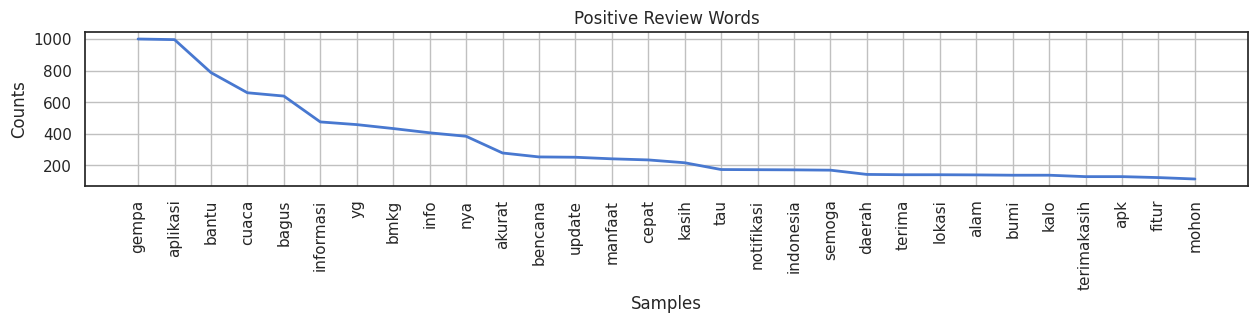

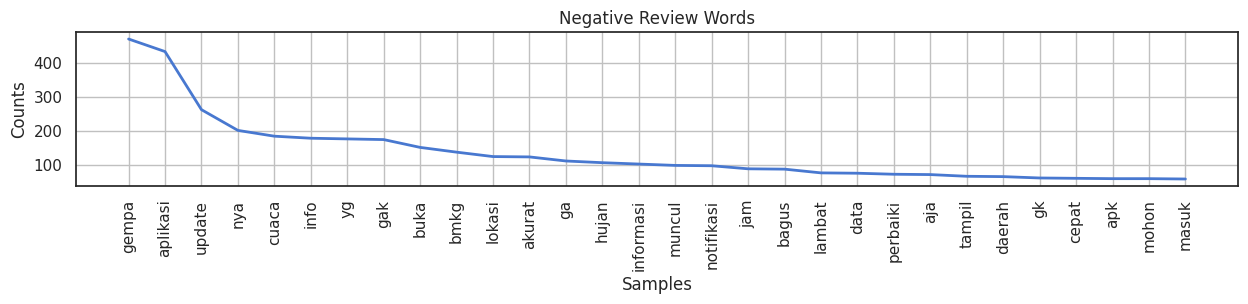

In [ ]:
# visualisasi top 30 kata
plt.figure(figsize=(15,2))
positive_freq_dic.plot(30,  title='Positive Review Words');

plt.figure(figsize=(15,2))
negative_freq_dic.plot(30, title='Negative Review Words');

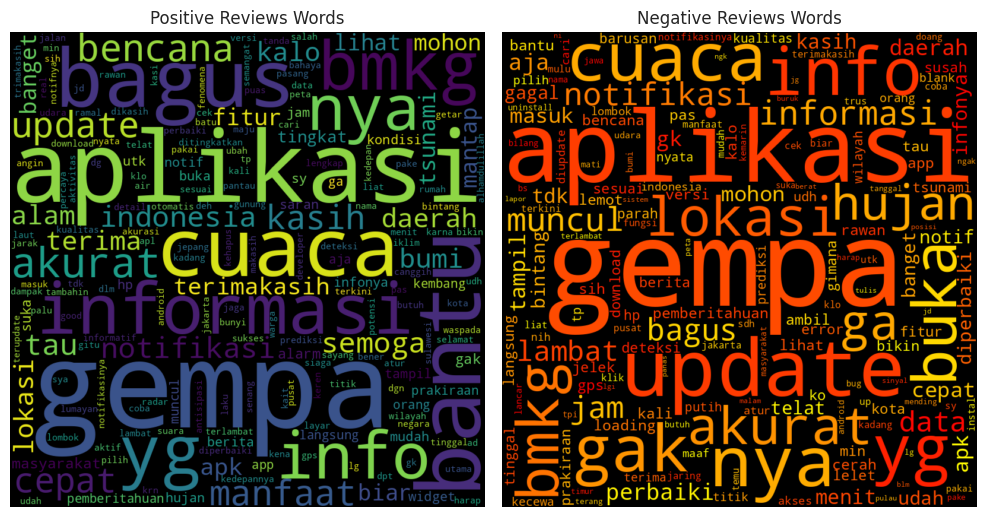

In [ ]:
def plot_important_words(pos_dic, neg_dic):
    fig, ax=plt.subplots(ncols=2, figsize=(10,10))

    wc = WordCloud(background_color='black',\
                min_font_size=8, width=800, height=800,\
                        colormap=None ).generate_from_frequencies(pos_dic)
    ax[0].imshow(wc, interpolation='bilinear')
    ax[0].set_title('Positive Reviews Words')
    ax[0].axis('off');

    wc = WordCloud(background_color='black',\
               min_font_size=12, width=800, height=800,\
                     colormap='autumn' ).generate_from_frequencies(neg_dic)
    ax[1].imshow(wc, interpolation='bilinear' )
    ax[1].set_title('Negative Reviews Words')
    ax[1].axis('off');

    fig.set_tight_layout({'pad':1})

plot_important_words(positive_freq_dic, negative_freq_dic)

In [ ]:
pos=set(x[0] for x in positive_freq_dic.most_common(20))
neg=set(x[0] for x in negative_freq_dic.most_common(20))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'aplikasi', 'bagus', 'akurat', 'nya', 'info', 'gempa', 'update', 'yg', 'cuaca', 'notifikasi', 'informasi', 'bmkg'}

Dari 20 kata terdapat 12 yang sama


In [ ]:
pos=set(x[0] for x in positive_freq_dic.most_common(100))
neg=set(x[0] for x in negative_freq_dic.most_common(100))

print(neg & pos)
print('\nDari', len(neg), 'kata terdapat', len(neg & pos), 'yang sama')

{'aplikasi', 'nya', 'orang', 'muncul', 'prakiraan', 'jam', 'tsunami', 'titik', 'cepat', 'cari', 'notif', 'bmkg', 'prediksi', 'bagus', 'akurat', 'kasih', 'kalo', 'info', 'gempa', 'tampil', 'cuaca', 'perbaiki', 'informasi', 'bintang', 'download', 'lokasi', 'hujan', 'bencana', 'sih', 'udah', 'gak', 'mohon', 'pemberitahuan', 'hp', 'fitur', 'masuk', 'langsung', 'update', 'indonesia', 'ga', 'daerah', 'banget', 'app', 'apk', 'tdk', 'wilayah', 'terima', 'tinggal', 'infonya', 'bantu', 'berita', 'buka', 'aja', 'yg', 'notifikasi', 'tau', 'pas', 'min', 'kota', 'data', 'menit', 'lihat'}

Dari 100 kata terdapat 62 yang sama


In [ ]:
more_stop_word =[
    'atidakr', 'sama', 'saya', 'kalau', 'terjadi', 'untuk', 'jam', 'dini', 'tidak',
    'yang', 'bisa', 'di', 'baik', 'lama', 'lebih', 'apa', 'selalu', 'notif', 'kejadian',
    'padahal', 'bencana', 'terimakasih', 'ada', 'santidakt', 'apk', 'banget', 'banyak',
    'cuaca', 'notifikasi', 'kasih', 'hujan', 'buka', 'masuk', 'lokasi', 'sering', 'terus',
    'baru', 'app', 'jutidak', 'dulu', 'sekali', 'update', 'buat', 'kurang', 'terima', 'akurat',
    'tsunami', 'malah', 'jadi', 'baru', 'tsunami', 'semotidak', 'kok', 'alarm', 'hp', 'mengambil',
    'saran', 'indonesia', 'santidakt', 'jutidak', 'jutidak', 'apk', 'infonya', 'notifikasi', 'peringatan',
    'sayarat', 'tdk', 'terbaru', 'hujan', 'dentidakn', 'cuacanya', 'terima', 'mohon', 'barusan', 'semoga',
    'kejadian', 'muncul', 'langsung', 'kasih', 'terimakasih', 'aplikasi', 'perintidaktan', 'tingtidakl',
    'pengguna', 'tau', 'prediksi', 'info', 'biar', 'banget', 'update', 'jantidakn', 'fitur', 'ngtidak',
    'prakiraan', 'sih', 'masuk', 'gps', 'app', 'gempanya', 'data', 'nya', 'jam', 'hp', 'menit', 'kota',
    'ngtidak', 'bencana', 'daerah', 'cepat', 'buka', 'pas', 'aplikasinya', 'sesuai', 'santidakt', 'alam',
    'tampilan', 'bagus', 'pemberitahuan', 'titik', 'wilayah', 'bmkg', 'versi', 'msudah','gempa', 'min', 'ga',
    'notif', 'cuaca', 'lokasi', 'developer', 'informasi', 'bumi', 'tidaktidak1', 'masayaarakat', 'berawan', 'batidakimana',
    'perbaiki', 'widget', 'kadang', 'download', 'orang', 'klo', 'sehingtidak', 'diperbaiki', 'jepang', 'mentidakmbil',
    'bunyi', 'tidaktidakl', 'perkiraan', 'gk', 'bintang', 'cerah', 'bikin', 'kali', 'dibuka', 'ditingkatkan', 'tingtidak1', 'membantu',
    'yg', 'gak', 'aja', 'masyarakat', 'lihat', 'tingkat', 'kalo', 'bantu', 'udah', 'tampil', 'kembang', 'utk', 'ambil', 'berita',
    'kondisi', 'laut', 'pantau', 'suara', 'deteksi', 'jalan', 'terkini', 'sy'
]


positive2_freq_dic={key:value for key,value in positive_freq_dic.items() if key not in more_stop_word}
negative2_freq_dic={key:value for key,value in negative_freq_dic.items() if key not in more_stop_word}

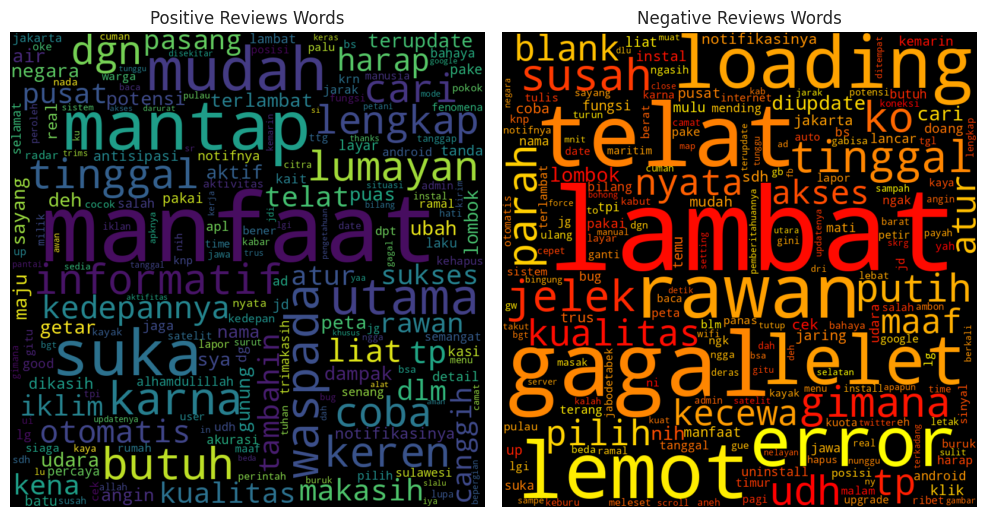

In [ ]:
plot_important_words(positive2_freq_dic, negative2_freq_dic)

In [ ]:
# stopword removal pt2
def more_stopword(content):
  content = [word for word in content if word not in more_stop_word]
  return content

df['content_lemma'] = df['content_lemma'].apply(lambda x: more_stopword(x))

In [ ]:
df.head()

,content,score,content_lemma
1,"[sangat, bermanfaat]",Positive,[manfaat]
2,"[bmkg, handal, demi, indonesia, sukses, selalu...",Positive,"[handal, sukses, selaluaamiin]"
3,"[min, kalok, prediksi, cuaca, yg, bener, dong,...",Negative,"[kalok, bener, ujan, tpi, ujan, nih, denpasar,..."
4,"[aplikasinya, cukup, bagus, cuma, sedikit, sar...",Positive,"[partisipasi, pilih, fenomena, terkadang, feno..."
5,"[aplikasi, ini, bisa, mendeteksi, gempa]",Positive,[]


In [ ]:
# stemming
def stemming(content):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = []
  for i in content:
    x = stemmer.stem(i)
    text.append(x)
  content_clean = []
  content_clean = ' '.join(text)
  return content_clean

df['content_stemm'] = df['content_lemma'].apply(lambda x: stemming(x))
df.to_csv('bmkg_prepross_data.csv', index=False)

In [ ]:
path = '/content/bmkg_prepross_data.csv'

df_prepross = pd.read_csv(path)
df_prepross.head()

,content,score,content_lemma,content_stemm
0,"['sangat', 'bermanfaat']",Positive,['manfaat'],manfaat
1,"['bmkg', 'handal', 'demi', 'indonesia', 'sukse...",Positive,"['handal', 'sukses', 'selaluaamiin']",handal sukses selaluaamiin
2,"['min', 'kalok', 'prediksi', 'cuaca', 'yg', 'b...",Negative,"['kalok', 'bener', 'ujan', 'tpi', 'ujan', 'nih...",kalok bener ujan tpi ujan nih denpasar php lu
3,"['aplikasinya', 'cukup', 'bagus', 'cuma', 'sed...",Positive,"['partisipasi', 'pilih', 'fenomena', 'terkadan...",partisipasi pilih fenomena terkadang fenomena ...
4,"['aplikasi', 'ini', 'bisa', 'mendeteksi', 'gem...",Positive,[],NaN


In [ ]:
df_prepross.shape

(4430, 4)

In [ ]:
df_prepross.isnull().sum()

,0
content,0
score,0
content_lemma,0
content_stemm,533


In [ ]:
df_clean = df_prepross.dropna()

In [ ]:
df_clean.shape

(3897, 4)

In [ ]:
df_clean.head()

,content,score,content_lemma,content_stemm
0,"['sangat', 'bermanfaat']",Positive,['manfaat'],manfaat
1,"['bmkg', 'handal', 'demi', 'indonesia', 'sukse...",Positive,"['handal', 'sukses', 'selaluaamiin']",handal sukses selaluaamiin
2,"['min', 'kalok', 'prediksi', 'cuaca', 'yg', 'b...",Negative,"['kalok', 'bener', 'ujan', 'tpi', 'ujan', 'nih...",kalok bener ujan tpi ujan nih denpasar php lu
3,"['aplikasinya', 'cukup', 'bagus', 'cuma', 'sed...",Positive,"['partisipasi', 'pilih', 'fenomena', 'terkadan...",partisipasi pilih fenomena terkadang fenomena ...
5,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap


In [ ]:
df_clean.rename(columns={'content': 'review', 'score': 'sentiment'}, inplace=True)
df_clean.head()

,review,sentiment,content_lemma,content_stemm
0,"['sangat', 'bermanfaat']",Positive,['manfaat'],manfaat
1,"['bmkg', 'handal', 'demi', 'indonesia', 'sukse...",Positive,"['handal', 'sukses', 'selaluaamiin']",handal sukses selaluaamiin
2,"['min', 'kalok', 'prediksi', 'cuaca', 'yg', 'b...",Negative,"['kalok', 'bener', 'ujan', 'tpi', 'ujan', 'nih...",kalok bener ujan tpi ujan nih denpasar php lu
3,"['aplikasinya', 'cukup', 'bagus', 'cuma', 'sed...",Positive,"['partisipasi', 'pilih', 'fenomena', 'terkadan...",partisipasi pilih fenomena terkadang fenomena ...
5,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap


In [ ]:
df_clean.reset_index(drop=True, inplace=True)
df_clean.head()

,review,sentiment,content_lemma,content_stemm
0,"['sangat', 'bermanfaat']",Positive,['manfaat'],manfaat
1,"['bmkg', 'handal', 'demi', 'indonesia', 'sukse...",Positive,"['handal', 'sukses', 'selaluaamiin']",handal sukses selaluaamiin
2,"['min', 'kalok', 'prediksi', 'cuaca', 'yg', 'b...",Negative,"['kalok', 'bener', 'ujan', 'tpi', 'ujan', 'nih...",kalok bener ujan tpi ujan nih denpasar php lu
3,"['aplikasinya', 'cukup', 'bagus', 'cuma', 'sed...",Positive,"['partisipasi', 'pilih', 'fenomena', 'terkadan...",partisipasi pilih fenomena terkadang fenomena ...
4,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap


In [ ]:
df_clean.sample(10)

,review,sentiment,content_lemma,content_stemm
422,"['fitur', 'yang', 'di', 'kasih', 'sudah', 'bag...",Positive,"['manfaat', 'utama', 'wilayahwilayah', 'sayang...",manfaat utama wilayahwilayah sayang suhucuaca ...
314,"['aplikasinya', 'semakin', 'baik', 'tapi', 'ad...",Positive,"['klu', 'share', 'wa']",klu share wa
1263,"['di', 'optimalkan', 'lagi', 'kalo', 'bisa', '...",Positive,"['optimalkan', 'lambat', 'pemberitauan', 'male...",optimal lambat pemberitauan malem sabtu apr an...
2696,"['sangat', 'butuh', 'informasi', 'dari', 'appl...",Positive,"['butuh', 'applikasi']",butuh applikasi
2199,"['bagus', 'dan', 'juga', 'saya', 'tau', 'giman...",Positive,"['gimana', 'pokok', 'nih', 'ni', 'mudah', 'ins...",gimana pokok nih ni mudah instal rugi beneran ...
811,"['tampilan', 'ui', 'nya', 'udah', 'bagus', 'da...",Positive,"['ui', 'bel', 'keras', 'asa', 'magnitude']",ui bel keras asa magnitude
3426,"['selalu', 'perbaharui', 'agar', 'lbh', 'baik']",Positive,"['perbaharui', 'lbh']",baharu lbh
2585,"['kurang', 'akurat', 'lambat', 'kasi', 'info',...",Positive,"['lambat', 'kasi', 'kasi', 'alarem']",lambat kasi kasi alarem
473,"['aplikasi', 'bmkg', 'ini', 'lambat', 'memberi...",Negative,"['lambat', 'kait', 'buruk', 'nyata', 'buruk']",lambat kait buruk nyata buruk
2477,"['mendapat', 'iformasi', 'akurat', 'sangat', '...",Positive,['iformasi'],iformasi


In [ ]:
df_clean.to_csv('bmkg_clean_data.csv')

## Feature Engineering

### TF-IDF

In [ ]:
tfidf = TfidfVectorizer(
    use_idf=True,
    smooth_idf=True,
    max_features=1500
)

response = tfidf.fit_transform(df_clean['content_stemm'])

df_tfidf = pd.DataFrame(
    response.toarray(),
    columns=tfidf.get_feature_names_out()
)

df_tfidf.head()

,aamiin,abis,aceh,ad,ada,adax,admin,adu,agustus,ah,...,wkwk,wkwkwk,yaa,yaaa,yah,yng,you,youtube,zona,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
response.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
reducer = UMAP()
X_umap = reducer.fit_transform(response.toarray())

df_clean['umap_1'] = X_umap[:, 0]
df_clean['umap_2'] = X_umap[:, 1]

In [ ]:
df_clean['sentiment'] = df_clean['sentiment'].map({'Positive': 1, 'Negative': 0})

In [ ]:
fig = px.scatter(df_clean, x='umap_1', y='umap_2', color='sentiment', title='UMAP Visualization of BMKG App Reviews Use Tf-Idf', text='content_stemm')
fig.update_layout(height=650)
fig.show()

### Word2Vec

In [ ]:
sentences = []
for content_lemma in df['content_lemma']:
  sentences.append(word_tokenize(" ".join(content_lemma)))

sentences = [sentence for sentence in sentences if sentence]
sentences[:10]

[['manfaat'],
 ['handal', 'sukses', 'selaluaamiin'],
 ['kalok', 'bener', 'ujan', 'tpi', 'ujan', 'nih', 'denpasar', 'php', 'lu'],
 ['partisipasi',
  'pilih',
  'fenomena',
  'terkadang',
  'fenomena',
  'rawan',
  'ringan',
  'angin',
  'kencang',
  'pilih',
  'fenomena',
  'maju'],
 ['mode', 'gelap'],
 ['bagustwrima'],
 ['sampah'],
 ['informatif'],
 ['mengikutiuntuk', 'tentamg', 'fenomena', 'iklim'],
 ['mantap']]

In [ ]:
w2vec = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=3,
    sg=0
)

w2vec.save('word2vec.model')

In [ ]:
model_w2vec = Word2Vec.load('word2vec.model')

In [ ]:
w2v = model_w2vec.wv
w2v.index_to_key[:10]

['manfaat',
 'mantap',
 'suka',
 'mudah',
 'lambat',
 'telat',
 'tinggal',
 'utama',
 'rawan',
 'butuh']

In [ ]:
w2v.most_similar('rawan')

[('udh', 0.830117404460907),
 ('sdh', 0.8298436403274536),
 ('tinggal', 0.8093566298484802),
 ('karna', 0.7931692004203796),
 ('suka', 0.78633713722229),
 ('angin', 0.7832615375518799),
 ('jawa', 0.7792212963104248),
 ('fungsi', 0.7762285470962524),
 ('nyata', 0.7692914009094238),
 ('negara', 0.7670451402664185)]

In [ ]:
X = UMAP().fit_transform(w2v.vectors)

df2 = pd.DataFrame(X, columns=['umap1', 'umap2'])
df2['word'] = w2v.index_to_key

fig = px.scatter(df2, x='umap1', y='umap2', text='word')
fig.update_traces(textposition='top center')
fig.update_layout(height = 800,
                  title_text = 'Word2Vec Visualization')
fig.show()

In [ ]:
df2.head()

,umap1,umap2,word
0,0.324266,2.723791,manfaat
1,2.579957,3.443547,mantap
2,-0.147968,2.398997,suka
3,0.298413,3.006104,mudah
4,0.998043,2.358728,lambat


## Data Modelling

### Word2Vec

In [ ]:
# Fungsi untuk merata-rata vektor kata untuk satu dokumen
def vectorize_document(doc, model, vector_size):
    words = [word for word in doc if word in model.wv.key_to_index]
    if len(words) == 0:
        return np.zeros(vector_size)
    return np.mean([model.wv[word] for word in words], axis=0)

# Membuat vektor dokumen untuk seluruh data train dan test
X_train_vectors = np.array([vectorize_document(doc, w2vec, 100) for doc in sentences])

In [ ]:
# Bagi data menjadi train dan test
X_train_w2, X_test_w2, y_train_w2, y_test_w2 = train_test_split(X_train_vectors, df_clean['sentiment'], test_size=0.2, random_state=42)

# logistic regression
classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train_w2, y_train_w2)

LogisticRegression(class_weight='balanced')

### TF-IDF

In [ ]:
# tfidf
X = tfidf.fit_transform(df_clean['content_stemm'])
y = df_clean['sentiment']

# SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Model Evaluation

### Word2Vec

In [ ]:
# prediksi dan evaluasi model
y_pred_w2 = classifier.predict(X_test_w2)
print("Accuracy:", accuracy_score(y_test_w2, y_pred_w2))
print(classification_report(y_test_w2, y_pred_w2))

Accuracy: 0.6038461538461538
              precision    recall  f1-score   support

           0       0.39      0.61      0.48       232
           1       0.78      0.60      0.68       548

    accuracy                           0.60       780
   macro avg       0.59      0.60      0.58       780
weighted avg       0.67      0.60      0.62       780



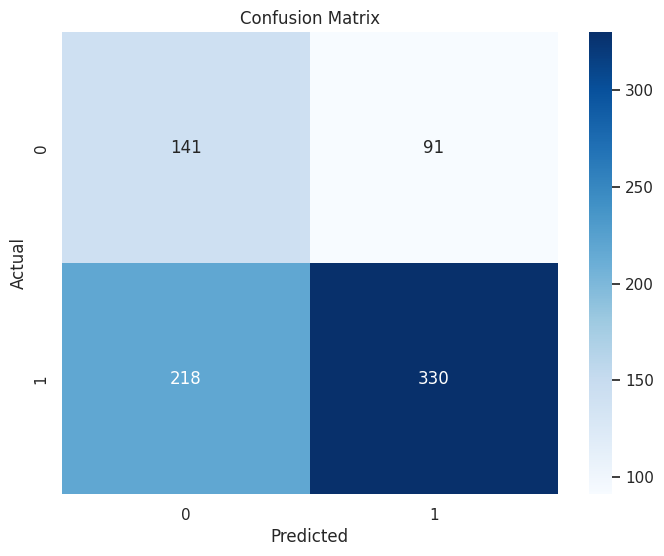

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test_w2, y_pred_w2)

# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### TF-IDF

In [ ]:
# Multinomial Naive Bayes
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)
y_pred_mnb = mnb_classifier.predict(X_test)
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes Accuracy: 0.9347133757961783
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       444
           1       0.97      0.80      0.88       184

    accuracy                           0.93       628
   macro avg       0.95      0.90      0.92       628
weighted avg       0.94      0.93      0.93       628



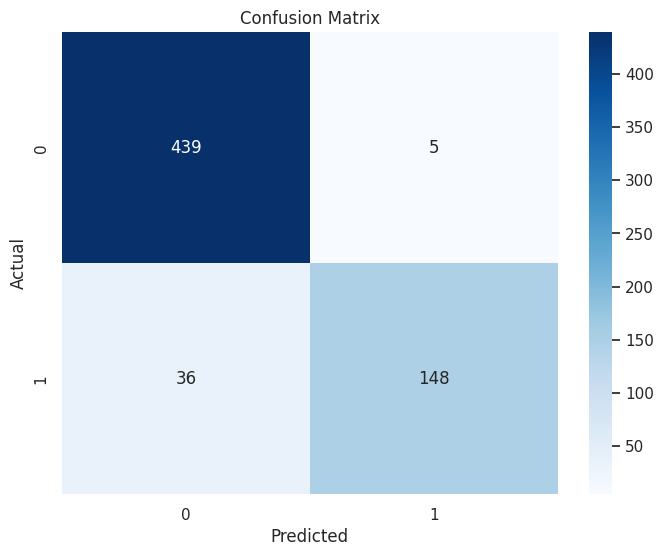

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_mnb)

# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Bernoulli Naive Bayes
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train, y_train)
y_pred_bnb = bnb_classifier.predict(X_test)
print('Bernoulli Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))

Bernoulli Naive Bayes Accuracy: 0.9601910828025477
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       444
           1       0.90      0.97      0.93       184

    accuracy                           0.96       628
   macro avg       0.94      0.96      0.95       628
weighted avg       0.96      0.96      0.96       628



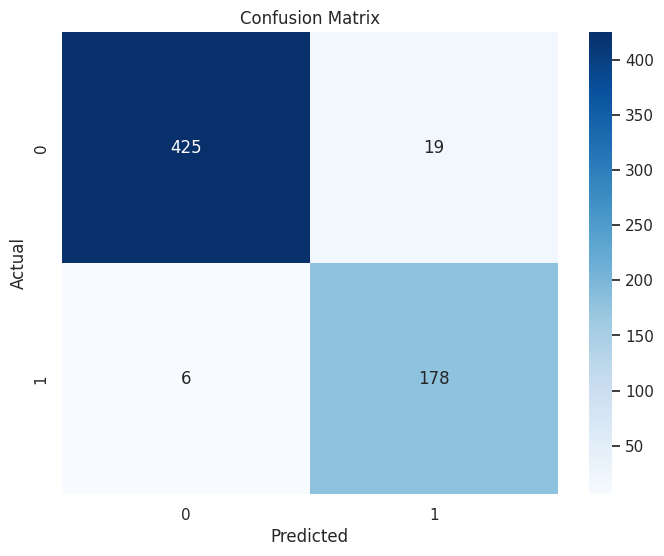

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_bnb)

# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Gaussian Naive Bayes
gnb_classifier = GaussianNB()

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

gnb_classifier.fit(X_train_dense, y_train)
y_pred_gnb = gnb_classifier.predict(X_test_dense)
print('Gaussian Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

Gaussian Naive Bayes Accuracy: 0.945859872611465
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       444
           1       0.89      0.92      0.91       184

    accuracy                           0.95       628
   macro avg       0.93      0.94      0.94       628
weighted avg       0.95      0.95      0.95       628



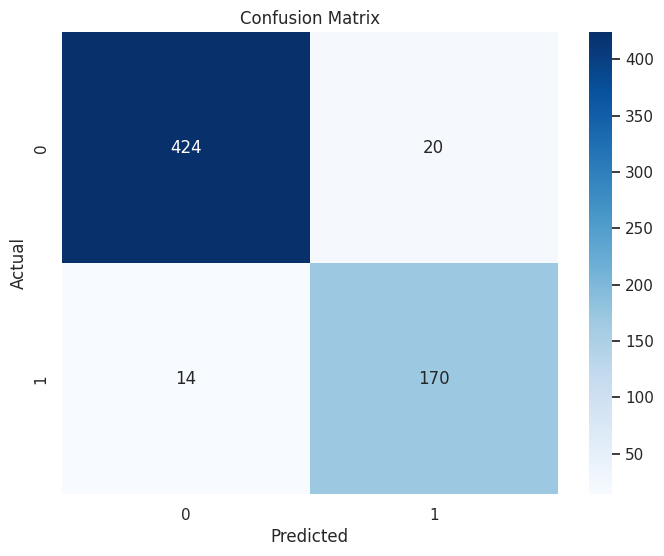

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)

# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Testing

In [ ]:
# testing
def test_model(model, tfidf, review_test):
  test_pred = model.predict(tfidf.transform(review_test).toarray())
  test_pred = ['Positive' if pred == 1 else 'Negative' for pred in test_pred]
  return test_pred

def test_model_w2v(model, w2v_model, data, vector_size=100):
    data_vectors = np.array([vectorize_document(doc, w2v_model, vector_size) for doc in data])
    predictions = model.predict(data_vectors)
    predictions = ['Positive' if pred == 1 else 'Negative' for pred in predictions]
    return predictions

review_test = [
    'ini sering loading, susah masuk aplikasinya',
    'sangat bermanfaat sekali'
]

test_pred = test_model(gnb_classifier, tfidf, review_test)
test_pred

['Negative', 'Positive']

In [ ]:
df_clean['prediksi_logistic'] = test_model_w2v(classifier, w2vec, sentences)
df_clean['prediksi_multinomial'] = test_model(mnb_classifier, tfidf, df_clean['content_stemm'])
df_clean['prediksi_bernouli'] = test_model(bnb_classifier, tfidf, df_clean['content_stemm'])
df_clean['prediksi_gaussian'] = test_model(gnb_classifier, tfidf, df_clean['content_stemm'])

df_clean_copy = df_clean.copy()
df_clean_copy['sentiment'] = df_clean_copy['sentiment'].map({1: 'Positive', 0: 'Negative'})
df_clean_copy.head()

,review,sentiment,content_lemma,content_stemm,umap_1,umap_2,prediksi_logistic,prediksi_multinomial,prediksi_bernouli,prediksi_gaussian
0,"['sangat', 'bermanfaat']",Positive,['manfaat'],manfaat,30.464334,10.837105,Positive,Positive,Positive,Positive
1,"['bmkg', 'handal', 'demi', 'indonesia', 'sukse...",Positive,"['handal', 'sukses', 'selaluaamiin']",handal sukses selaluaamiin,-1.757665,9.795642,Positive,Positive,Positive,Positive
2,"['min', 'kalok', 'prediksi', 'cuaca', 'yg', 'b...",Negative,"['kalok', 'bener', 'ujan', 'tpi', 'ujan', 'nih...",kalok bener ujan tpi ujan nih denpasar php lu,12.157842,1.427628,Negative,Negative,Negative,Negative
3,"['aplikasinya', 'cukup', 'bagus', 'cuma', 'sed...",Positive,"['partisipasi', 'pilih', 'fenomena', 'terkadan...",partisipasi pilih fenomena terkadang fenomena ...,6.477233,-1.934474,Negative,Negative,Negative,Positive
4,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap,-24.108051,43.432716,Positive,Positive,Positive,Positive


In [ ]:
df_clean_copy.iloc[:, [0,1,2,3,6,7,8,9]].head()

,review,sentiment,content_lemma,content_stemm,prediksi_logistic,prediksi_multinomial,prediksi_bernouli,prediksi_gaussian
0,"['sangat', 'bermanfaat']",Positive,['manfaat'],manfaat,Positive,Positive,Positive,Positive
1,"['bmkg', 'handal', 'demi', 'indonesia', 'sukse...",Positive,"['handal', 'sukses', 'selaluaamiin']",handal sukses selaluaamiin,Positive,Positive,Positive,Positive
2,"['min', 'kalok', 'prediksi', 'cuaca', 'yg', 'b...",Negative,"['kalok', 'bener', 'ujan', 'tpi', 'ujan', 'nih...",kalok bener ujan tpi ujan nih denpasar php lu,Negative,Negative,Negative,Negative
3,"['aplikasinya', 'cukup', 'bagus', 'cuma', 'sed...",Positive,"['partisipasi', 'pilih', 'fenomena', 'terkadan...",partisipasi pilih fenomena terkadang fenomena ...,Negative,Negative,Negative,Positive
4,"['untuk', 'keseluruhan', 'sudah', 'bagus', 'sa...",Positive,"['mode', 'gelap']",mode gelap,Positive,Positive,Positive,Positive
